#**Train & Evaluate Clustering Models**

In [ ]:
import pandas as pd
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv

data = pd.read_csv('seeds.csv')
features = data[data.columns[0:6]]
features.sample(10)

--2022-12-03 06:26:01--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: ‘seeds.csv.1’

seeds.csv.1         100%[===================>]   9.17K  --.-KB/s    in 0s      

2022-12-03 06:26:01 (48.7 MB/s) - ‘seeds.csv.1’ saved [9386/9386]



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
77,20.71,17.23,0.8763,6.579,3.814,4.451
86,18.88,16.26,0.8969,6.084,3.764,1.649
196,12.79,13.53,0.8786,5.224,3.054,5.483
145,11.21,13.13,0.8167,5.279,2.687,6.169
34,15.05,14.68,0.8779,5.712,3.328,2.129
38,14.80,14.52,0.8823,5.656,3.288,3.112
67,14.01,14.29,0.8625,5.609,3.158,2.217
194,12.11,13.27,0.8639,5.236,2.975,4.132
18,14.70,14.21,0.9153,5.205,3.466,1.767
105,18.83,16.29,0.8917,6.037,3.786,2.553


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

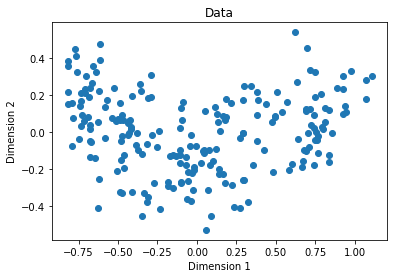

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

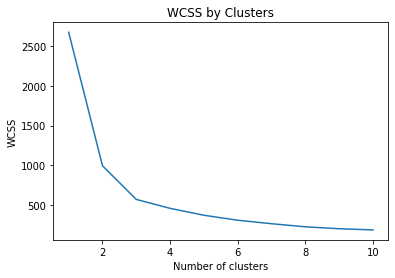

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(features.values)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#**Train & Evaluate Clustering Models**

In [4]:
import pandas as pd

!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

features = data[data.columns[0:6]]
features.sample(10)

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

pca = PCA(n_components=2).fit(scaled_features)
features_2D = pca.transform(scaled_features)
features_2D[0:10]

--2022-12-04 07:47:01--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: ‘seeds.csv.3’

seeds.csv.3         100%[===================>]   9.17K  --.-KB/s    in 0s      

2022-12-04 07:47:01 (99.2 MB/s) - ‘seeds.csv.3’ saved [9386/9386]



array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

In [16]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
km_cluster = model.fit_predict(features.values)
km_cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

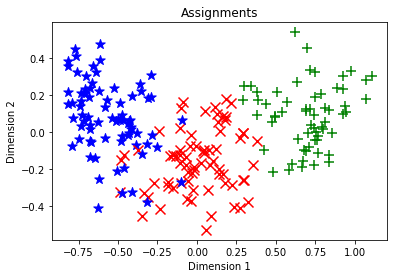

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
  col_dic = {0:"blue", 1:'green', 2:'red'}
  mark_dic = {0:'*', 1:'+',2:'x'}
  colors = [col_dic[x] for x in clusters]
  markers = [mark_dic[x] for x in clusters]
  for sample in range(len(clusters)):
    plt.scatter(samples[sample][0], samples[sample][1], color=colors[sample], marker=markers[sample], s=100)
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.title('Assignments')
  plt.show()

plot_clusters(features_2D, km_cluster)

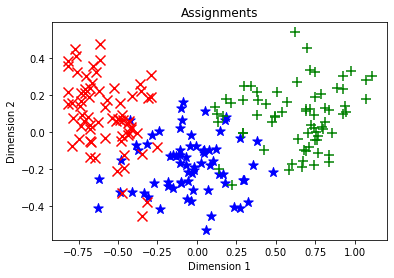

In [21]:
seeds_species = data[data.columns[7]]
plot_clusters(features_2D, seeds_species.values)

#**Agglomerative Clustering**

In [23]:
from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

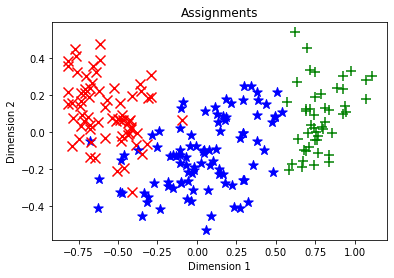

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
  col_dic = {0:"blue", 1:'green', 2:'red'}
  mark_dic = {0:'*', 1:'+',2:'x'}
  colors = [col_dic[x] for x in clusters]
  markers = [mark_dic[x] for x in clusters]
  for sample in range(len(clusters)):
    plt.scatter(samples[sample][0], samples[sample][1], color=colors[sample], marker=markers[sample], s=100)
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.title('Assignments')
  plt.show()

plot_clusters(features_2D, agg_clusters)